In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Full Data

In [2]:
cloud_cover = pd.read_csv('Bangkhuntean_CloudCover_2021-16Nov-16Dec.csv',skipinitialspace = True)
cloud_cover['Date'] = cloud_cover[['Year', 'Month', 'Day']].apply(lambda x: "{0}-{1}-{2}".format(str(x[0]).zfill(2), str(x[1]).zfill(2), str(x[2]).zfill(2)), axis=1) 
cloud_cover['Time'] = cloud_cover[['Hour']].apply(lambda x: "{}".format(str(x[0]).zfill(2)), axis=1)
cloud_cover.drop(["Year", "Month", "Day", "Hour", "Minute", "Second"], axis=1, inplace=True)  
cloud_cover = cloud_cover.rename(columns={"CloudCover":"cloud_cover"})
cloud_cover = cloud_cover.groupby(['Date', 'Time']).agg(cloud_cover=('cloud_cover','mean')).reset_index()
cloud_cover['DateTime'] = cloud_cover[['Date', 'Time']].apply(lambda x: "{} {}".format(str(x[0]).zfill(2), str(x[1]).zfill(2)), axis=1)
cloud_cover.drop(["Date", "Time"], axis=1, inplace=True)        
cloud_cover['DateTime'] = pd.to_datetime(cloud_cover['DateTime'], format="%Y-%m-%d %H:%M")
cloud_cover.dropna(inplace=True)
cloud_cover

,cloud_cover,DateTime
0,0.990899,2021-11-16 11:00:00
1,0.973114,2021-11-16 12:00:00
2,0.960600,2021-11-16 13:00:00
3,0.908915,2021-11-16 14:00:00
4,0.631449,2021-11-16 15:00:00
...,...,...
251,0.480200,2021-12-16 10:00:00
252,0.155117,2021-12-16 11:00:00
253,0.161317,2021-12-16 12:00:00
254,0.174650,2021-12-16 13:00:00


In [3]:
dti = pd.date_range('2021-11-16','2021-12-17',freq="H")
dti = pd.Index(dti,name='ds')
dti = pd.DataFrame(dti)
dti

,ds
0,2021-11-16 00:00:00
1,2021-11-16 01:00:00
2,2021-11-16 02:00:00
3,2021-11-16 03:00:00
4,2021-11-16 04:00:00
...,...
740,2021-12-16 20:00:00
741,2021-12-16 21:00:00
742,2021-12-16 22:00:00
743,2021-12-16 23:00:00


In [4]:
df = cloud_cover[['DateTime', 'cloud_cover']]
df.columns = ['ds', 'y']
df

,ds,y
0,2021-11-16 11:00:00,0.990899
1,2021-11-16 12:00:00,0.973114
2,2021-11-16 13:00:00,0.960600
3,2021-11-16 14:00:00,0.908915
4,2021-11-16 15:00:00,0.631449
...,...,...
251,2021-12-16 10:00:00,0.480200
252,2021-12-16 11:00:00,0.155117
253,2021-12-16 12:00:00,0.161317
254,2021-12-16 13:00:00,0.174650


In [5]:
df1 = pd.merge(df,dti,on= 'ds',how = 'outer')

df1.sort_values('ds')

# df1.to_csv('df1.csv')


,ds,y
256,2021-11-16 00:00:00,NaN
257,2021-11-16 01:00:00,NaN
258,2021-11-16 02:00:00,NaN
259,2021-11-16 03:00:00,NaN
260,2021-11-16 04:00:00,NaN
...,...,...
740,2021-12-16 20:00:00,NaN
741,2021-12-16 21:00:00,NaN
742,2021-12-16 22:00:00,NaN
743,2021-12-16 23:00:00,NaN


### Not complate 24H

In [6]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=30, freq="H")
future.tail(50)

16:30:45 - cmdstanpy - INFO - Chain [1] start processing
16:30:45 - cmdstanpy - INFO - Chain [1] done processing


,ds
236,2021-12-14 12:00:00
237,2021-12-14 13:00:00
238,2021-12-14 14:00:00
239,2021-12-14 15:00:00
240,2021-12-14 16:00:00
241,2021-12-15 08:00:00
242,2021-12-15 09:00:00
243,2021-12-15 10:00:00
244,2021-12-15 11:00:00
245,2021-12-15 12:00:00


In [7]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-16 11:00:00,0.783146,0.478306,1.249897,0.783146,0.783146,0.083459,0.083459,0.083459,-0.047821,-0.047821,-0.047821,0.131279,0.131279,0.131279,0.0,0.0,0.0,0.866604
1,2021-11-16 12:00:00,0.782593,0.512593,1.277568,0.782593,0.782593,0.087767,0.087767,0.087767,-0.039338,-0.039338,-0.039338,0.127105,0.127105,0.127105,0.0,0.0,0.0,0.870360
2,2021-11-16 13:00:00,0.782040,0.455441,1.240020,0.782040,0.782040,0.058129,0.058129,0.058129,-0.064217,-0.064217,-0.064217,0.122346,0.122346,0.122346,0.0,0.0,0.0,0.840169
3,2021-11-16 14:00:00,0.781488,0.369170,1.170959,0.781488,0.781488,-0.000991,-0.000991,-0.000991,-0.118019,-0.118019,-0.118019,0.117028,0.117028,0.117028,0.0,0.0,0.0,0.780497
4,2021-11-16 15:00:00,0.780935,0.316819,1.094624,0.780935,0.780935,-0.064894,-0.064894,-0.064894,-0.176078,-0.176078,-0.176078,0.111185,0.111185,0.111185,0.0,0.0,0.0,0.716041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2021-12-17 16:00:00,0.369248,-0.250446,0.536710,0.369248,0.369248,-0.233459,-0.233459,-0.233459,-0.200842,-0.200842,-0.200842,-0.032617,-0.032617,-0.032617,0.0,0.0,0.0,0.135789
282,2021-12-17 17:00:00,0.368695,-0.219163,0.577167,0.368695,0.368695,-0.202050,-0.202050,-0.202050,-0.162494,-0.162494,-0.162494,-0.039556,-0.039556,-0.039556,0.0,0.0,0.0,0.166646
283,2021-12-17 18:00:00,0.368143,-0.159194,0.647353,0.368143,0.368143,-0.108395,-0.108395,-0.108395,-0.061949,-0.061949,-0.061949,-0.046446,-0.046446,-0.046446,0.0,0.0,0.0,0.259748
284,2021-12-17 19:00:00,0.367590,-0.009823,0.750972,0.367590,0.367590,0.009187,0.009187,0.009187,0.062424,0.062424,0.062424,-0.053237,-0.053237,-0.053237,0.0,0.0,0.0,0.376777


In [8]:
dfcst = forecast[['ds','yhat','yhat_lower','yhat_upper']]
dfcst

,ds,yhat,yhat_lower,yhat_upper
0,2021-11-16 11:00:00,0.866604,0.478306,1.249897
1,2021-11-16 12:00:00,0.870360,0.512593,1.277568
2,2021-11-16 13:00:00,0.840169,0.455441,1.240020
3,2021-11-16 14:00:00,0.780497,0.369170,1.170959
4,2021-11-16 15:00:00,0.716041,0.316819,1.094624
...,...,...,...,...
281,2021-12-17 16:00:00,0.135789,-0.250446,0.536710
282,2021-12-17 17:00:00,0.166646,-0.219163,0.577167
283,2021-12-17 18:00:00,0.259748,-0.159194,0.647353
284,2021-12-17 19:00:00,0.376777,-0.009823,0.750972


In [9]:
dt = pd.merge(df, dfcst, left_on='ds', right_on='ds')
dt

,ds,y,yhat,yhat_lower,yhat_upper
0,2021-11-16 11:00:00,0.990899,0.866604,0.478306,1.249897
1,2021-11-16 12:00:00,0.973114,0.870360,0.512593,1.277568
2,2021-11-16 13:00:00,0.960600,0.840169,0.455441,1.240020
3,2021-11-16 14:00:00,0.908915,0.780497,0.369170,1.170959
4,2021-11-16 15:00:00,0.631449,0.716041,0.316819,1.094624
...,...,...,...,...,...
251,2021-12-16 10:00:00,0.480200,0.314159,-0.090066,0.689626
252,2021-12-16 11:00:00,0.155117,0.348627,-0.021139,0.723747
253,2021-12-16 12:00:00,0.161317,0.361580,-0.012492,0.753270
254,2021-12-16 13:00:00,0.174650,0.340926,-0.015843,0.727513


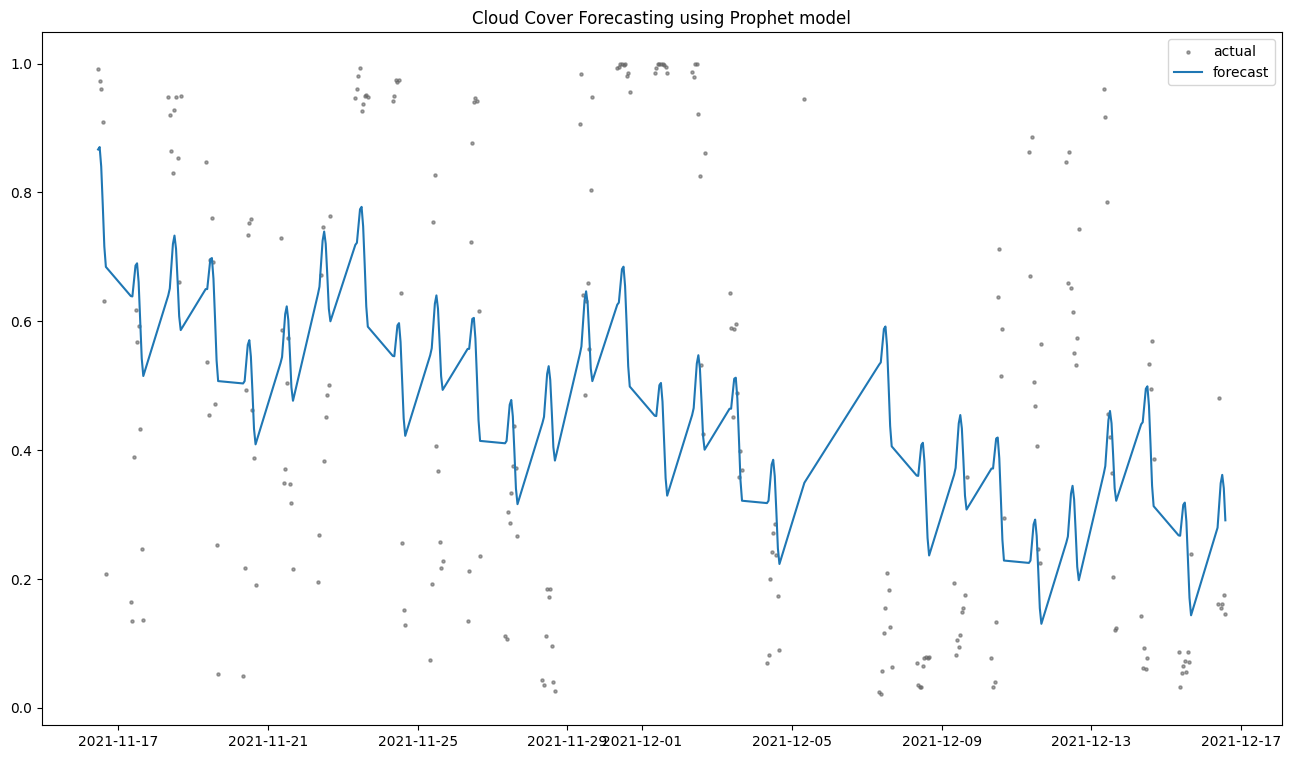

In [10]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title('Cloud Cover Forecasting using Prophet model')
plt.legend()

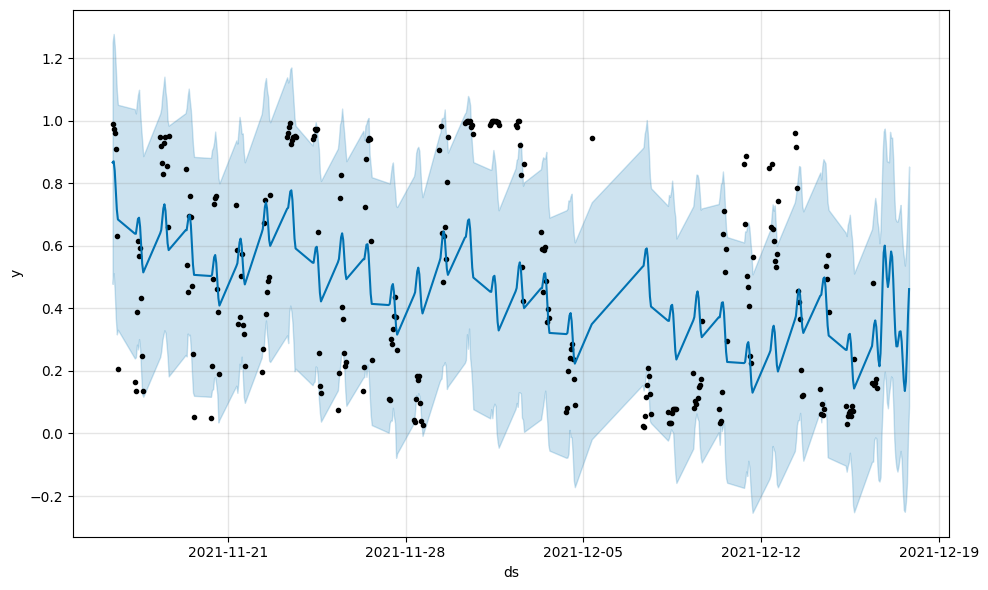

In [11]:
fig1 = model.plot(forecast)

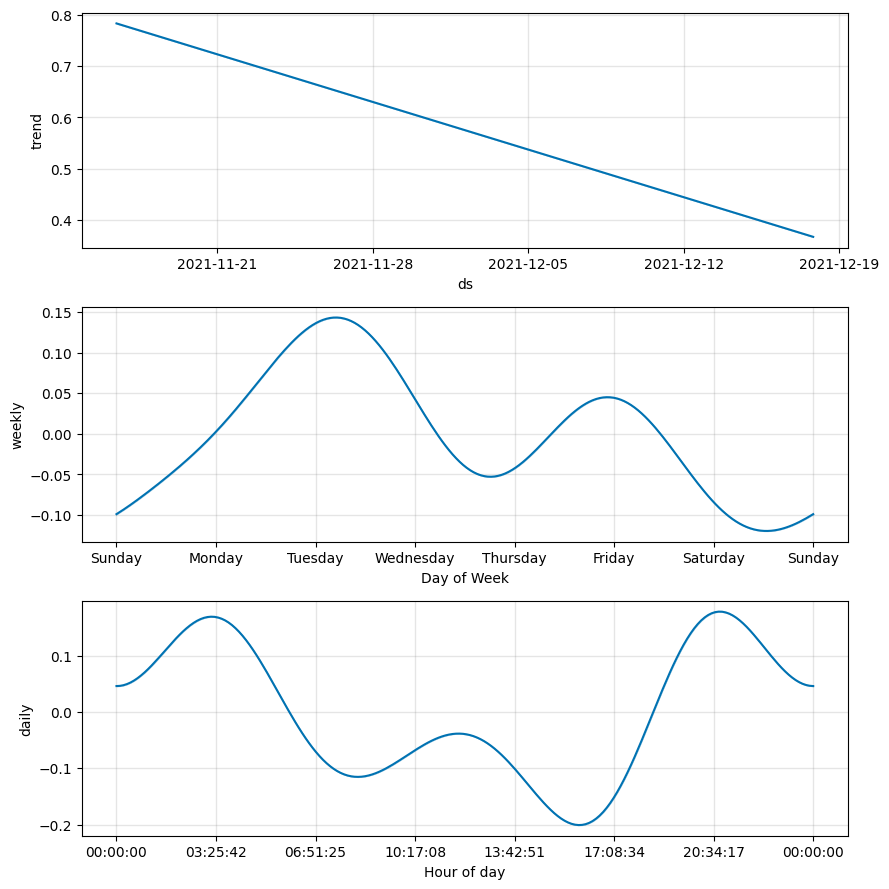

In [12]:
fig = model.plot_components(forecast)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
prophet_mse_error = mean_squared_error(dt["y"], dt["yhat"], squared=True)
prophet_rmse_error = mean_squared_error(dt["y"], dt["yhat"], squared=False)
prophet_mae_error = mean_absolute_error(dt["y"], dt["yhat"])
prophet_r2 = r2_score(dt["y"], dt["yhat"])

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMAE: {prophet_mae_error}\nr2_score: {prophet_r2}')

MSE Error: 0.09266777471111833
RMSE Error: 0.3044138214850277
MAE: 0.26212697106851285
r2_score: 0.18466662355925123


In [14]:
from statsmodels.tsa.stattools import adfuller

adf_res = adfuller(df['ds'], autolag = 'AIC')
print('p-Values:' + str(adf_res[1]))

p-Values:1.0


---

# แทนค่า cloud_cover nan to 0

In [15]:
df2 = df1.fillna(0)
df2

,ds,y
0,2021-11-16 11:00:00,0.990899
1,2021-11-16 12:00:00,0.973114
2,2021-11-16 13:00:00,0.960600
3,2021-11-16 14:00:00,0.908915
4,2021-11-16 15:00:00,0.631449
...,...,...
740,2021-12-16 20:00:00,0.000000
741,2021-12-16 21:00:00,0.000000
742,2021-12-16 22:00:00,0.000000
743,2021-12-16 23:00:00,0.000000


In [16]:
df2 = df2.sort_values('ds')

In [17]:
# df2.to_csv('df1_nan_to_0.csv')

In [18]:
model1 = Prophet()
model1.fit(df2)
future1 = model1.make_future_dataframe(periods=20, freq="H")
future1.tail(50)

16:30:57 - cmdstanpy - INFO - Chain [1] start processing
16:30:57 - cmdstanpy - INFO - Chain [1] done processing


,ds
715,2021-12-15 19:00:00
716,2021-12-15 20:00:00
717,2021-12-15 21:00:00
718,2021-12-15 22:00:00
719,2021-12-15 23:00:00
720,2021-12-16 00:00:00
721,2021-12-16 01:00:00
722,2021-12-16 02:00:00
723,2021-12-16 03:00:00
724,2021-12-16 04:00:00


In [19]:
forecast1 = model1.predict(future1)
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-16 00:00:00,0.223013,-0.221717,0.318612,0.223013,0.223013,-0.162706,-0.162706,-0.162706,-0.189730,-0.189730,-0.189730,0.027024,0.027024,0.027024,0.0,0.0,0.0,0.060307
1,2021-11-16 01:00:00,0.222907,-0.171998,0.335309,0.222907,0.222907,-0.143009,-0.143009,-0.143009,-0.172673,-0.172673,-0.172673,0.029664,0.029664,0.029664,0.0,0.0,0.0,0.079898
2,2021-11-16 02:00:00,0.222801,-0.165546,0.391605,0.222801,0.222801,-0.115261,-0.115261,-0.115261,-0.147417,-0.147417,-0.147417,0.032157,0.032157,0.032157,0.0,0.0,0.0,0.107540
3,2021-11-16 03:00:00,0.222695,-0.167922,0.374883,0.222695,0.222695,-0.115933,-0.115933,-0.115933,-0.150416,-0.150416,-0.150416,0.034483,0.034483,0.034483,0.0,0.0,0.0,0.106762
4,2021-11-16 04:00:00,0.222589,-0.184038,0.349983,0.222589,0.222589,-0.149509,-0.149509,-0.149509,-0.186135,-0.186135,-0.186135,0.036626,0.036626,0.036626,0.0,0.0,0.0,0.073081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,2021-12-17 16:00:00,0.074445,-0.099088,0.439013,0.074409,0.074493,0.096681,0.096681,0.096681,0.092431,0.092431,0.092431,0.004249,0.004249,0.004249,0.0,0.0,0.0,0.171126
761,2021-12-17 17:00:00,0.074178,-0.271199,0.266783,0.074137,0.074233,-0.062206,-0.062206,-0.062206,-0.064073,-0.064073,-0.064073,0.001867,0.001867,0.001867,0.0,0.0,0.0,0.011973
762,2021-12-17 18:00:00,0.073911,-0.359013,0.170768,0.073867,0.073971,-0.174739,-0.174739,-0.174739,-0.174212,-0.174212,-0.174212,-0.000527,-0.000527,-0.000527,0.0,0.0,0.0,-0.100827
763,2021-12-17 19:00:00,0.073644,-0.393434,0.158762,0.073595,0.073711,-0.206104,-0.206104,-0.206104,-0.203188,-0.203188,-0.203188,-0.002916,-0.002916,-0.002916,0.0,0.0,0.0,-0.132460


In [20]:
dfcst1 = forecast1[['ds','yhat','yhat_lower','yhat_upper']]
dfcst1

,ds,yhat,yhat_lower,yhat_upper
0,2021-11-16 00:00:00,0.060307,-0.221717,0.318612
1,2021-11-16 01:00:00,0.079898,-0.171998,0.335309
2,2021-11-16 02:00:00,0.107540,-0.165546,0.391605
3,2021-11-16 03:00:00,0.106762,-0.167922,0.374883
4,2021-11-16 04:00:00,0.073081,-0.184038,0.349983
...,...,...,...,...
760,2021-12-17 16:00:00,0.171126,-0.099088,0.439013
761,2021-12-17 17:00:00,0.011973,-0.271199,0.266783
762,2021-12-17 18:00:00,-0.100827,-0.359013,0.170768
763,2021-12-17 19:00:00,-0.132460,-0.393434,0.158762


In [21]:
dt1 = pd.merge(df2, dfcst1, left_on='ds', right_on='ds')
dt1

,ds,y,yhat,yhat_lower,yhat_upper
0,2021-11-16 00:00:00,0.0,0.060307,-0.221717,0.318612
1,2021-11-16 01:00:00,0.0,0.079898,-0.171998,0.335309
2,2021-11-16 02:00:00,0.0,0.107540,-0.165546,0.391605
3,2021-11-16 03:00:00,0.0,0.106762,-0.167922,0.374883
4,2021-11-16 04:00:00,0.0,0.073081,-0.184038,0.349983
...,...,...,...,...,...
740,2021-12-16 20:00:00,0.0,-0.068435,-0.332256,0.207887
741,2021-12-16 21:00:00,0.0,-0.037718,-0.328200,0.241752
742,2021-12-16 22:00:00,0.0,-0.041696,-0.303691,0.245254
743,2021-12-16 23:00:00,0.0,-0.069199,-0.327465,0.190042


In [22]:
# dt1 = dt1.sort_values('ds')
# dt1

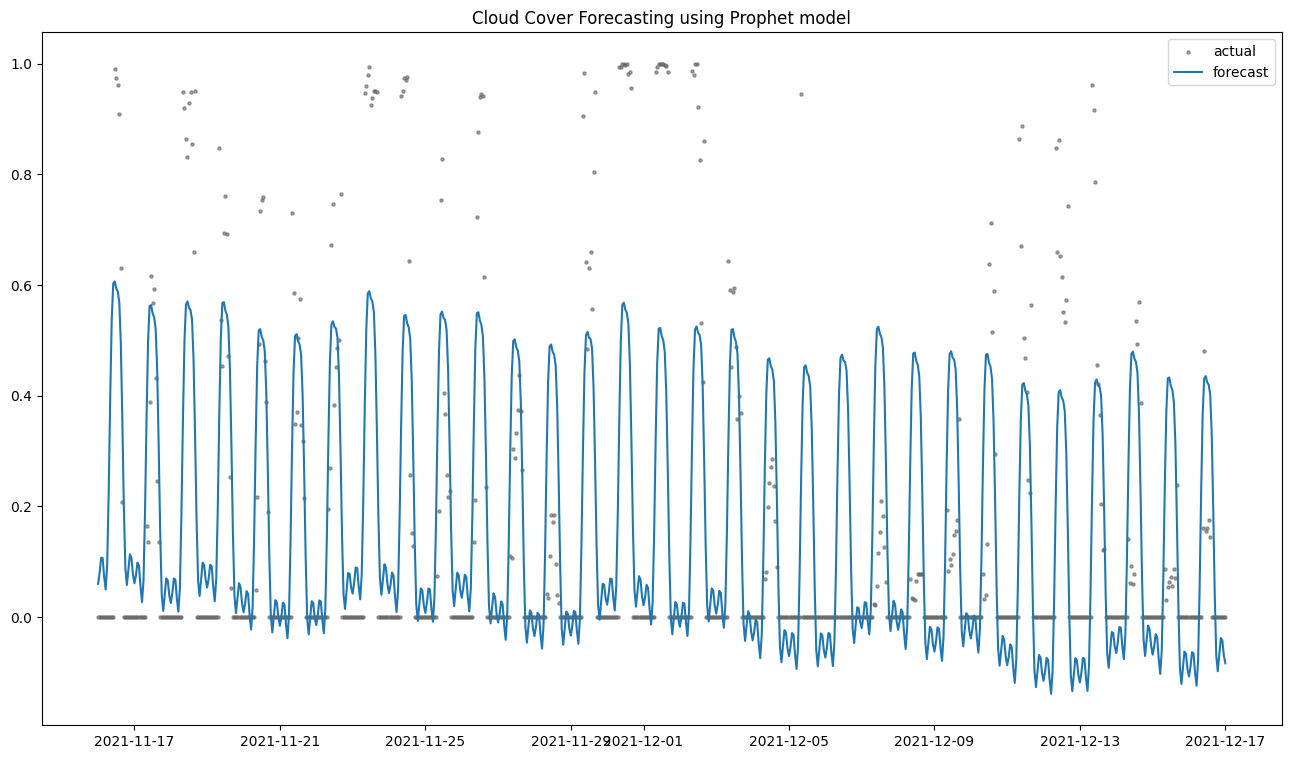

In [23]:
plt.figure(figsize=(16,9))
plt.scatter(dt1['ds'], dt1['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt1['ds'], dt1['yhat'], label='forecast')
plt.title('Cloud Cover Forecasting using Prophet model')
plt.legend()

In [24]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(mode='lines', x= dt1['ds'], y=dt1["y"], name='Train'))
fig.add_trace(go.Scatter(mode='lines', x=dt1['ds'], y = dt1["yhat"], name='Forecast prophet predict test set'))
# fig.add_trace(go.Scatter(mode='lines', x=X_test['ds'], y = X_test["y"], name='Test'))
# fig.add_trace(go.Scatter(mode='lines', x=df['ds'], y = df["y"],  name='Real Data'))
# fig.add_trace(go.Scatter(mode='lines', x=fcast30min['ds'], y =fcast30min["yhat"],  name='Forecast prophet predict future 30 min'))

fig.update_layout(
    autosize=True,
    height=600,
    title="Prophet Model",
    xaxis_title="Date",
    yaxis_title="Cloud cover",
)


fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1.zoom x1",
                     step="hour",
                     stepmode="backward"),
                 dict(count=2,
                     label="2.zoom x2",
                     step="hour",
                     stepmode="backward"),
                dict(count=3,
                     label="3.zoom x3",
                     step="day",
                     stepmode="backward"),              

                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

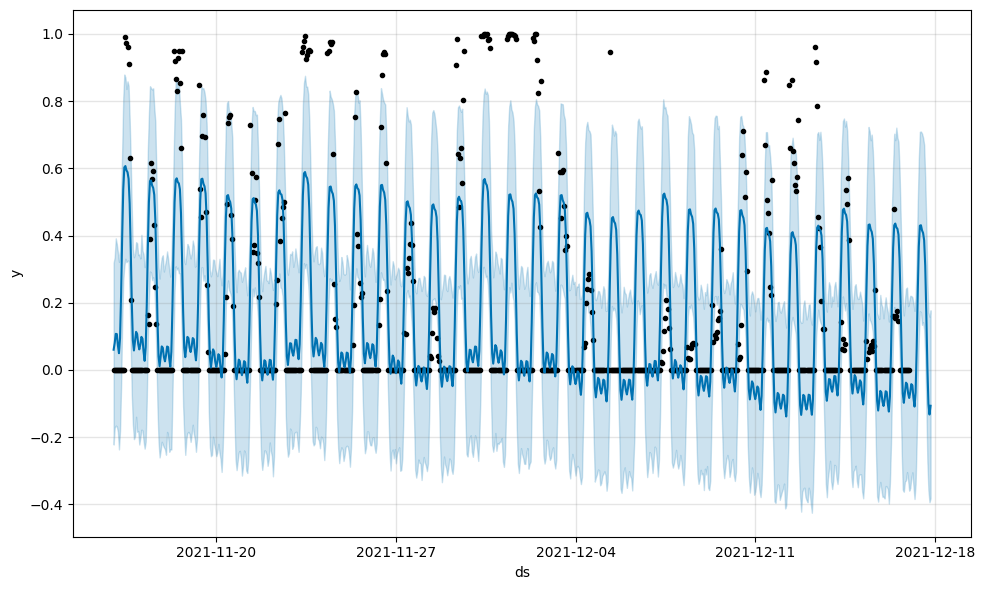

In [25]:
fig1 = model1.plot(forecast1)

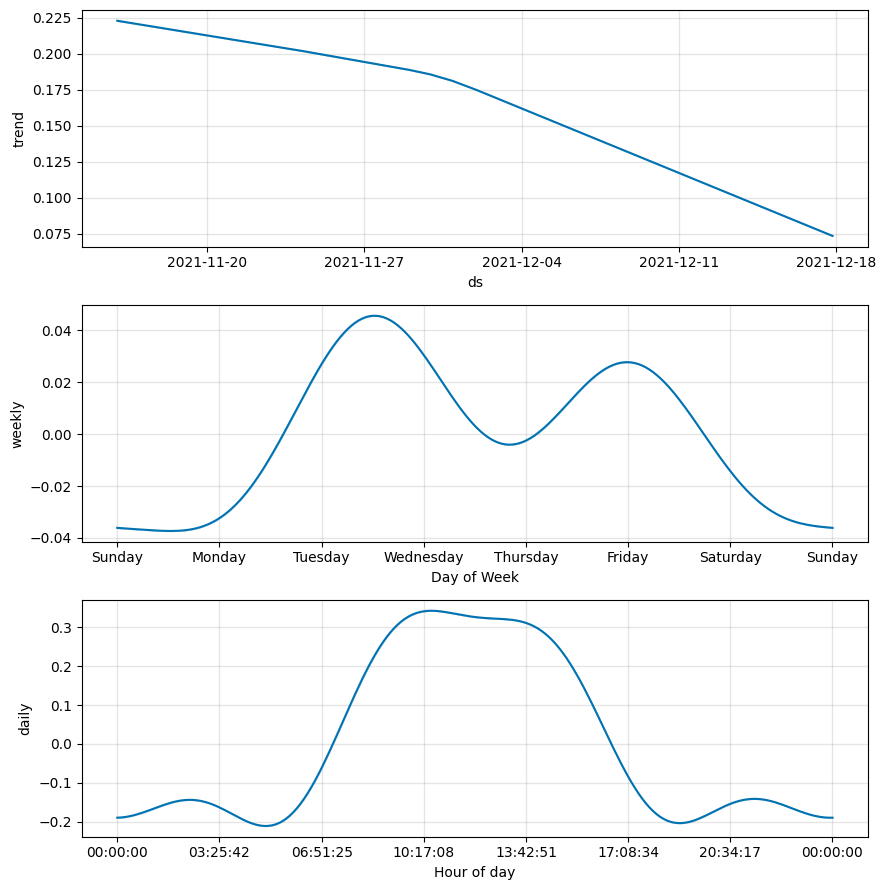

In [26]:
fig = model1.plot_components(forecast1)

In [27]:
prophet_mse_error = mean_squared_error(dt1["y"], dt1["yhat"], squared=True)
prophet_rmse_error = mean_squared_error(dt1["y"], dt1["yhat"], squared=False)
prophet_mae_error = mean_absolute_error(dt1["y"], dt1["yhat"])
prophet_r2 = r2_score(dt1["y"], dt1["yhat"])

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMAE: {prophet_mae_error}\nr2_score: {prophet_r2}')

MSE Error: 0.044825478451788414
RMSE Error: 0.21172028351527497
MAE: 0.14188854417008628
r2_score: 0.5165446130269269


In [28]:
from statsmodels.tsa.stattools import adfuller

adf_res = adfuller(df2['ds'], autolag = 'AIC')
print('p-Values:' + str(adf_res[1]))

p-Values:0.9612570119884384
